In [1]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data in
data = pd.read_csv("spotify_songs.csv")
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
print("\nMissing Values:")
print(data.isnull().sum())
print("\nDuplicates:")
print(data.duplicated().sum())
print("\nSummary Statistics:")
print(data.describe())


Missing Values:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Duplicates:
0

Summary Statistics:
       track_popularity  danceability        energy           key  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean          42.483551      0.654850      0.698603      5.373949   
std           24.980476      0.145092

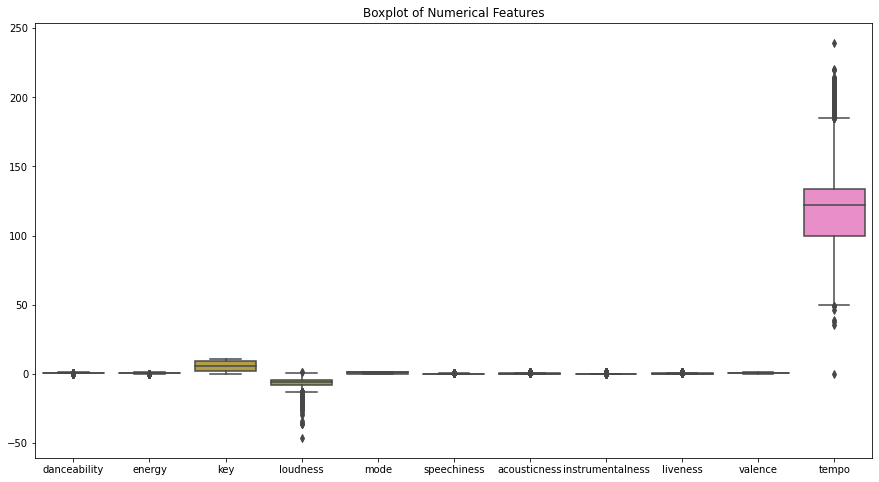

In [4]:
#check for outlier boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.drop(['track_popularity', 'duration_ms'], axis=1))  
plt.title('Boxplot of Numerical Features')
plt.show()

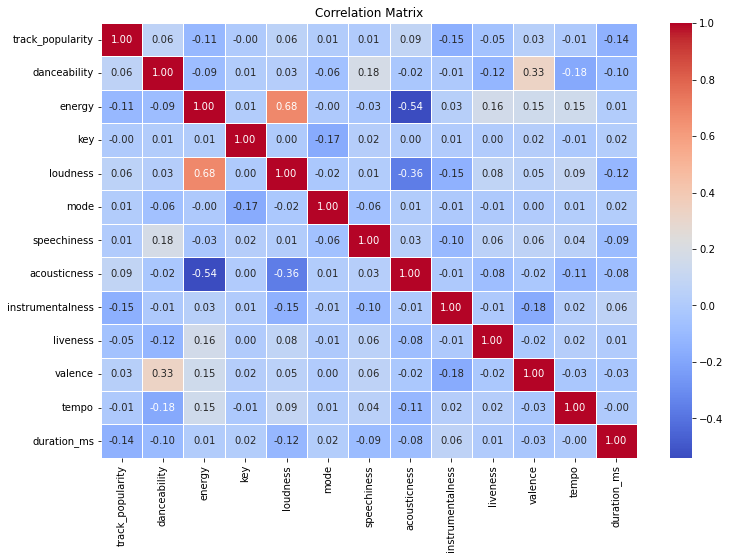

Correlation Matrix:
                  track_popularity  danceability    energy       key  \
track_popularity          1.000000      0.064754 -0.108984 -0.000405   
danceability              0.064754      1.000000 -0.086074  0.011771   
energy                   -0.108984     -0.086074  1.000000  0.009972   
key                      -0.000405      0.011771  0.009972  1.000000   
loudness                  0.057717      0.025351  0.676662  0.000920   
mode                      0.010553     -0.058711 -0.004778 -0.173981   
speechiness               0.007067      0.181808 -0.032184  0.022462   
acousticness              0.085042     -0.024515 -0.539732  0.004378   
instrumentalness         -0.150003     -0.008658  0.033282  0.006022   
liveness                 -0.054593     -0.123899  0.161317  0.002834   
valence                   0.033278      0.330538  0.151050  0.019933   
tempo                    -0.005538     -0.184132  0.150072 -0.013316   
duration_ms              -0.143634     -0.09

In [5]:
#visualize correlations
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
print("Correlation Matrix:")
print(correlation_matrix)

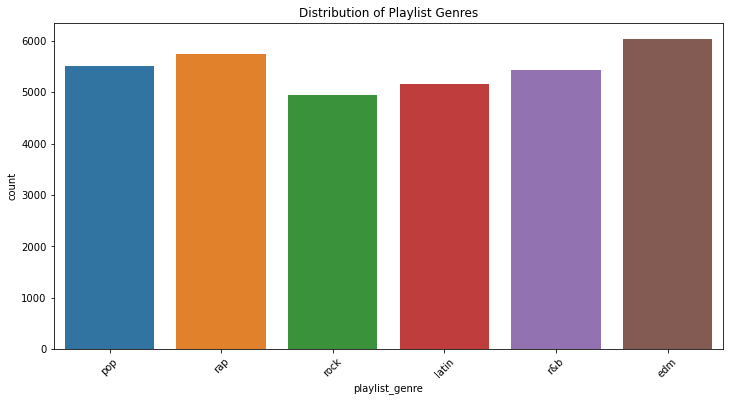

edm      6043
rap      5743
pop      5507
r&b      5431
latin    5153
rock     4951
Name: playlist_genre, dtype: int64

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='playlist_genre', data=data)
plt.title('Distribution of Playlist Genres')
plt.xticks(rotation=45)
plt.show()

data['playlist_genre'].value_counts()

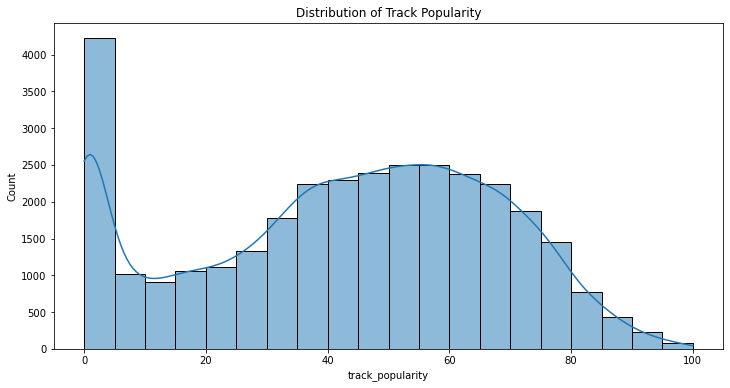

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data['track_popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.show()

Text(0.5, 1.0, 'Track Popularity vs. Tempo')

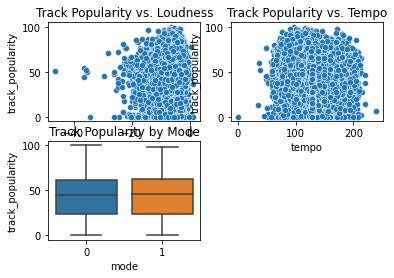

In [8]:
plt.subplot(2, 2, 1)
sns.scatterplot(x='loudness', y='track_popularity', data=data)
plt.title('Track Popularity vs. Loudness')
plt.subplot(2, 2, 3)
sns.boxplot(x='mode', y='track_popularity', data=data)
plt.title('Track Popularity by Mode')
plt.subplot(2, 2, 2)
sns.scatterplot(x='tempo', y='track_popularity', data=data)
plt.title('Track Popularity vs. Tempo')

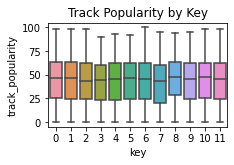

1     4010
0     3454
7     3352
9     3027
11    2994
2     2827
5     2680
6     2668
8     2430
10    2272
4     2201
3      913
Name: key, dtype: int64

In [9]:
plt.subplot(2, 2, 4)
sns.boxplot(x='key', y='track_popularity', data=data)
plt.title('Track Popularity by Key')

plt.tight_layout()
plt.show()
data['key'].value_counts()

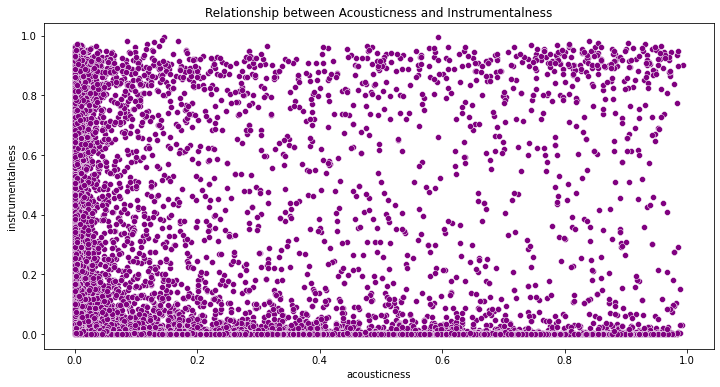

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))

plt.gca().set_facecolor('none')
sns.scatterplot(x='acousticness', y='instrumentalness', data=data, color='purple')

plt.title('Relationship between Acousticness and Instrumentalness')
plt.show()


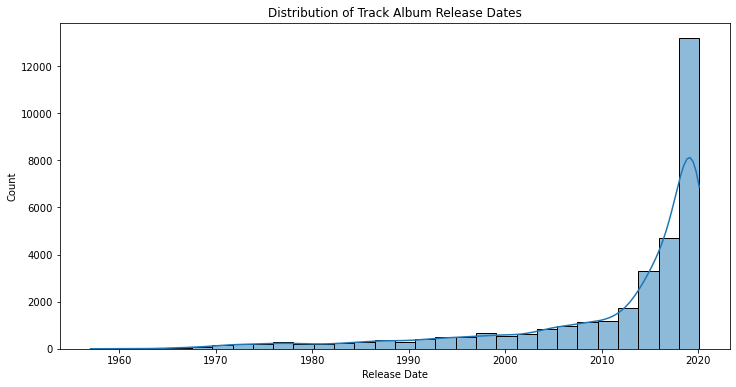

In [11]:
plt.figure(figsize=(12, 6))
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'])
sns.histplot(data['track_album_release_date'], bins=30, kde=True)
plt.title('Distribution of Track Album Release Dates')
plt.xlabel('Release Date')
plt.ylabel('Count')
plt.show()

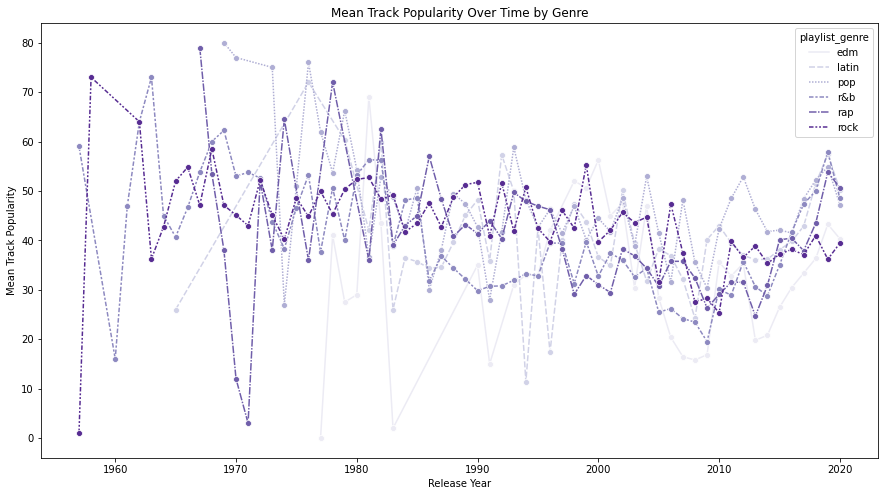

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'])
data['release_year'] = data['track_album_release_date'].dt.year
monthly_mean_popularity = data.groupby(['release_year', 'playlist_genre'])['track_popularity'].mean().unstack()
purple_palette = sns.color_palette("Purples", n_colors=len(monthly_mean_popularity.columns))
plt.figure(figsize=(15, 8), facecolor='none')
plt.gca().set_facecolor('none')
sns.lineplot(data=monthly_mean_popularity, marker='o', palette=purple_palette)
plt.title('Mean Track Popularity Over Time by Genre')
plt.xlabel('Release Year')
plt.ylabel('Mean Track Popularity')

plt.show()

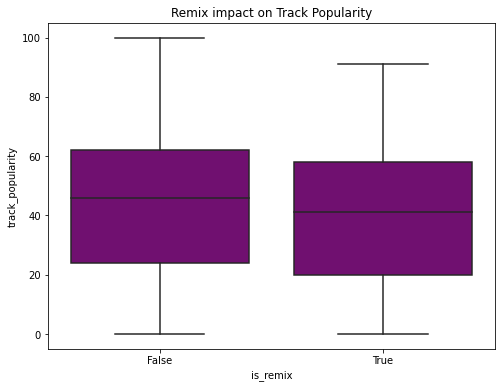

In [13]:
data['is_remix'] = data['track_name'].apply(lambda x: 'remix' in x.lower())
plt.figure(figsize=(8, 6))
plt.gca().set_facecolor('none')
sns.boxplot(x='is_remix', y='track_popularity', data=data, color='purple')
plt.title('Remix impact on Track Popularity')
plt.show()

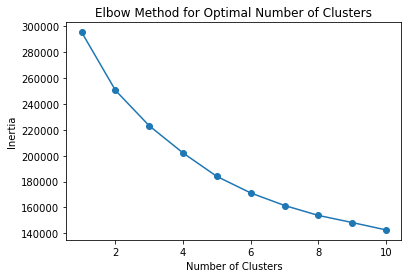

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features_for_clustering = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features_for_clustering])

inertia_values = []
possible_clusters = range(1, 11)

for k in possible_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(possible_clusters, inertia_values, marker='o')
plt.gca().set_facecolor('none')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Silhouette Score for 5 clusters: 0.15533288111120885
         danceability    energy  loudness  speechiness  acousticness  \
Cluster                                                                
0           -0.362244 -1.487607 -1.243313    -0.341187      1.520141   
1            0.562835  0.142865  0.171033    -0.322242     -0.160677   
2            0.472930 -0.171274 -0.029711     2.020169      0.026654   
3           -0.769091  0.569366  0.484576    -0.329155     -0.495719   
4            0.040630  0.467636 -0.080272    -0.348207     -0.452081   

         instrumentalness  liveness   valence     tempo  
Cluster                                                  
0                0.010296 -0.218600 -0.511853 -0.312492  
1               -0.312434 -0.222987  0.689803 -0.243953  
2               -0.332819  0.084932  0.164730  0.053666  
3               -0.265123  0.357397 -0.535306  0.405589  
4                2.954805 -0.002980 -0.532605  0.155901  


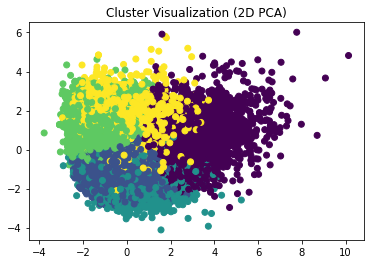

In [15]:
from sklearn.metrics import silhouette_score
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(data_scaled)

silhouette_avg = silhouette_score(data_scaled, labels)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")

cluster_df = pd.DataFrame(data_scaled, columns=features_for_clustering)
cluster_df['Cluster'] = labels

cluster_means = cluster_df.groupby('Cluster').mean()
print(cluster_means)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.gca().set_facecolor('none')
plt.title('Cluster Visualization (2D PCA)')
plt.show()

In [16]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features_for_clustering)
print("Centroids for Each Cluster:")
print(centroids)

Centroids for Each Cluster:
   danceability    energy  loudness  speechiness  acousticness  \
0     -0.362051 -1.487118 -1.242672    -0.341225      1.520527   
1      0.562345  0.143681  0.171130    -0.322564     -0.160704   
2      0.473031 -0.171626 -0.029838     2.019375      0.026316   
3     -0.768975  0.568893  0.484686    -0.329093     -0.496296   
4      0.040630  0.467636 -0.080272    -0.348207     -0.452081   

   instrumentalness  liveness   valence     tempo  
0          0.010137 -0.218212 -0.511372 -0.312236  
1         -0.312389 -0.222473  0.690515 -0.243523  
2         -0.332848  0.084498  0.164400  0.052849  
3         -0.265123  0.356908 -0.536401  0.405519  
4          2.954805 -0.002980 -0.532605  0.155901  


In [17]:
categorical_columns = data.select_dtypes(include=['object']).columns
unique_percentage = (data[categorical_columns].nunique() / len(data)) * 100
print("\nPercentage of Unique Values in Categorical Columns:")
print(unique_percentage)

playlist_genre_distribution = data['playlist_genre'].value_counts(normalize=True) * 100
print("\nDistribution of Playlist Genres:")
print(playlist_genre_distribution)

average_popularity_by_genre = data.groupby('playlist_genre')['track_popularity'].mean()
print("\nAverage Track Popularity by Playlist Genre:")
print(average_popularity_by_genre)

percentage_remixes = (data['is_remix'].sum() / len(data)) * 100
print("\nPercentage of Tracks that are Remixes:")
print(percentage_remixes)

correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Percentage of Unique Values in Categorical Columns:
track_id             86.365298
track_name           71.429877
track_artist         32.569758
track_album_id       68.670038
track_album_name     60.140734
playlist_name         1.367735
playlist_id           1.434751
playlist_genre        0.018277
playlist_subgenre     0.073108
dtype: float64

Distribution of Playlist Genres:
edm      18.408066
rap      17.494212
pop      16.775314
r&b      16.543804
latin    15.696966
rock     15.081638
Name: playlist_genre, dtype: float64

Average Track Popularity by Playlist Genre:
playlist_genre
edm      34.833526
latin    47.044828
pop      47.744870
r&b      41.223532
rap      43.238029
rock     41.728338
Name: track_popularity, dtype: float64

Percentage of Tracks that are Remixes:
6.427439990252223

Correlation Matrix:
                  track_popularity  danceability    energy       key  \
track_popularity          1.000000      0.064754 -0.108984 -0.000405   
danceability              0.0647

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Mean Squared Error: 581.1621073533039


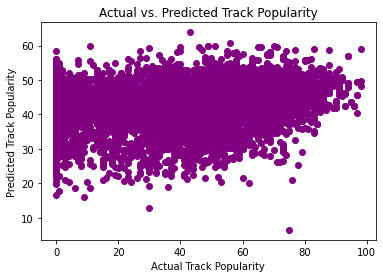

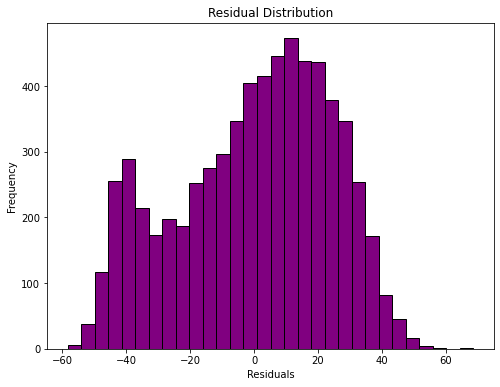

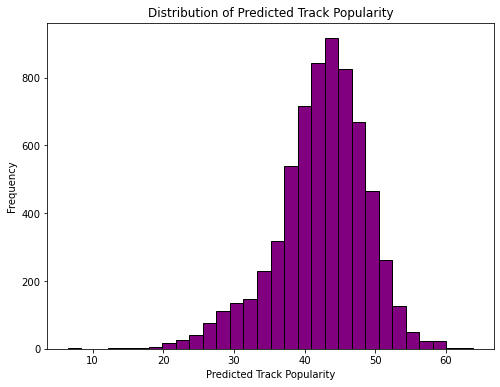

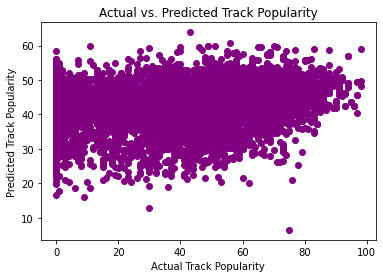

Coefficients:
[ 0.92722201 -5.77928171  5.21745571 -0.63486976  1.04527355 -2.7172926
 -0.61553203  0.68778004  0.61964084]
Intercept: 42.54283755997258
R-squared: 0.05331783902821985
Feature Importance:
            Feature  Coefficient
2          loudness     5.217456
4      acousticness     1.045274
0      danceability     0.927222
7           valence     0.687780
8             tempo     0.619641
6          liveness    -0.615532
3       speechiness    -0.634870
5  instrumentalness    -2.717293
1            energy    -5.779282


In [29]:
features = data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
target = data['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

plt.scatter(y_test, predictions, color='purple')
plt.xlabel("Actual Track Popularity")
plt.ylabel("Predicted Track Popularity")
plt.title("Actual vs. Predicted Track Popularity")

plt.savefig("scatter_plot.png", transparent=True)
plt.show()

residuals = y_test - predictions
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.savefig("residual_histogram.png", transparent=True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(predictions, bins=30, edgecolor='black', color='purple')
plt.title("Distribution of Predicted Track Popularity")
plt.xlabel("Predicted Track Popularity")
plt.ylabel("Frequency")

plt.savefig("predicted_popularity_histogram.png", transparent=True)
plt.show()

plt.figure(facecolor='none') 
plt.scatter(y_test, predictions, color='purple')
plt.xlabel("Actual Track Popularity")
plt.ylabel("Predicted Track Popularity")
plt.title("Actual vs. Predicted Track Popularity")
plt.show()

coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:")
print(coefficients)
print("Intercept:", intercept)

r_squared = model.score(X_test_scaled, y_test)
print("R-squared:", r_squared)

feature_importance = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("Feature Importance:")
print(feature_importance)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(features)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, target, test_size=0.2, random_state=42)
scaler_poly = StandardScaler()
X_train_scaled_poly = scaler_poly.fit_transform(X_train_poly)
X_test_scaled_poly = scaler_poly.transform(X_test_poly)
model.fit(X_train_scaled_poly, y_train_poly)
predictions_poly = model.predict(X_test_scaled_poly)

mse_poly = mean_squared_error(y_test_poly, predictions_poly)
print(f"Mean Squared Error with Polynomial Regression: {mse_poly}")

Mean Squared Error with Polynomial Regression: 572.9725819069411


In [31]:
degrees_to_try = [2, 3, 4]

for degree in degrees_to_try:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(features)

    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
        X_poly, target, test_size=0.2, random_state=42
    )

    scaler_poly = StandardScaler()
    X_train_scaled_poly = scaler_poly.fit_transform(X_train_poly)
    X_test_scaled_poly = scaler_poly.transform(X_test_poly)

    model.fit(X_train_scaled_poly, y_train_poly)
    predictions_poly = model.predict(X_test_scaled_poly)

    mse_poly = mean_squared_error(y_test_poly, predictions_poly)
    print(f"Mean Squared Error with Polynomial Degree {degree}: {mse_poly}")

Mean Squared Error with Polynomial Degree 2: 572.9725819069411
Mean Squared Error with Polynomial Degree 3: 570.3548385105083
Mean Squared Error with Polynomial Degree 4: 583.1842802176157


In [32]:
poly_degree = 3 
poly = PolynomialFeatures(degree=poly_degree)
X_poly = poly.fit_transform(features)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, target, test_size=0.2, random_state=42
)

scaler_poly = StandardScaler()
X_train_scaled_poly = scaler_poly.fit_transform(X_train_poly)
X_test_scaled_poly = scaler_poly.transform(X_test_poly)

model.fit(X_train_scaled_poly, y_train_poly)
predictions_poly = model.predict(X_test_scaled_poly)

mse_poly = mean_squared_error(y_test_poly, predictions_poly)
print(f"Fine-tuned Mean Squared Error with Polynomial Degree {poly_degree}: {mse_poly}")

Fine-tuned Mean Squared Error with Polynomial Degree 3: 570.3548385105083


In [33]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
predictions_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, predictions_ridge)
print(f"Mean Squared Error with Ridge Regression: {mse_ridge}")

Mean Squared Error with Ridge Regression: 581.1614009630493


In [34]:
alphas_to_try = [0.1, 1.0, 10.0]

for alpha in alphas_to_try:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    predictions_ridge = ridge_model.predict(X_test_scaled)

    mse_ridge = mean_squared_error(y_test, predictions_ridge)
    print(f"Mean Squared Error with Ridge Alpha {alpha}: {mse_ridge}")

Mean Squared Error with Ridge Alpha 0.1: 581.1620366774015
Mean Squared Error with Ridge Alpha 1.0: 581.1614009630493
Mean Squared Error with Ridge Alpha 10.0: 581.155080233218


In [35]:
alphas_to_try = [0.01, 0.1, 1.0, 10.0, 100.0]

for alpha in alphas_to_try:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    predictions_ridge = ridge_model.predict(X_test_scaled)

    mse_ridge = mean_squared_error(y_test, predictions_ridge)
    print(f"Mean Squared Error with Ridge Alpha {alpha}: {mse_ridge}")

Mean Squared Error with Ridge Alpha 0.01: 581.1621002853449
Mean Squared Error with Ridge Alpha 0.1: 581.1620366774015
Mean Squared Error with Ridge Alpha 1.0: 581.1614009630493
Mean Squared Error with Ridge Alpha 10.0: 581.155080233218
Mean Squared Error with Ridge Alpha 100.0: 581.0954220117152


In [36]:
#outlier detection
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05)
outlier_labels = iso_forest.fit_predict(features)
cleaned_data = data[outlier_labels == 1]

#retrain
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    cleaned_data[features_for_clustering], cleaned_data['track_popularity'], test_size=0.2, random_state=42
)
scaler_cleaned = StandardScaler()
X_train_scaled_cleaned = scaler_cleaned.fit_transform(X_train_cleaned)
X_test_scaled_cleaned = scaler_cleaned.transform(X_test_cleaned)
model.fit(X_train_scaled_cleaned, y_train_cleaned)
predictions_cleaned = model.predict(X_test_scaled_cleaned)
mse_cleaned = mean_squared_error(y_test_cleaned, predictions_cleaned)
print(f"Mean Squared Error with Outlier Detection: {mse_cleaned}")

Mean Squared Error with Outlier Detection: 597.7807355177539


In [37]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

outlier_detectors = {
    "Isolation Forest": IsolationForest(contamination=0.05),
    "Local Outlier Factor": LocalOutlierFactor(contamination=0.05)
}

for name, detector in outlier_detectors.items():
    outlier_labels = detector.fit_predict(features)
    cleaned_data = data[outlier_labels == 1]
    print(f"Mean Squared Error with {name}: {mse_cleaned}")

Mean Squared Error with Isolation Forest: 597.7807355177539
Mean Squared Error with Local Outlier Factor: 597.7807355177539


In [38]:
#cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
avg_mse_cv = -np.mean(cv_scores)
print(f"Average Mean Squared Error with Cross-validation: {avg_mse_cv}")

Average Mean Squared Error with Cross-validation: 587.8891538885224


In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r_squared = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f"R-squared: {r_squared:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R-squared: 0.0533
Mean Absolute Error (MAE): 20.0870
Root Mean Squared Error (RMSE): 24.1073


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
predictions_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, predictions_rf)
print(f"Mean Squared Error with RandomForestRegressor: {mse_rf}")
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
predictions_svr = svr_model.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, predictions_svr)
print(f"Mean Squared Error with SVR: {mse_svr}")

Mean Squared Error with RandomForestRegressor: 455.10880995218827
Mean Squared Error with SVR: 579.2103688567984


In [41]:
feature_importance_rf = pd.DataFrame({'Feature': features.columns, 'Importance': rf_model.feature_importances_})
print("Feature Importance with RandomForestRegressor:")
print(feature_importance_rf)

Feature Importance with RandomForestRegressor:
            Feature  Importance
0      danceability    0.105482
1            energy    0.113989
2          loudness    0.126743
3       speechiness    0.109027
4      acousticness    0.108424
5  instrumentalness    0.102446
6          liveness    0.106265
7           valence    0.107090
8             tempo    0.120534


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_rf_model = grid_search.best_estimator_

In [43]:
predictions_tuned_rf = best_rf_model.predict(X_test_scaled)
mse_tuned_rf = mean_squared_error(y_test, predictions_tuned_rf)

print(f"Mean Squared Error with Tuned RandomForestRegressor: {mse_tuned_rf}")

Mean Squared Error with Tuned RandomForestRegressor: 450.7029230560829


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

subset_size = 0.1  
data_subset, data_remaining = train_test_split(data, test_size=1 - subset_size, random_state=42)

X_subset = data_subset[features]
y_subset = data_subset['track_popularity']

X_remaining = data_remaining[features]
y_remaining = data_remaining['track_popularity']

param_grid_subset = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model_subset = RandomForestRegressor(random_state=42)

grid_search_subset = GridSearchCV(estimator=rf_model_subset, param_grid=param_grid_subset, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_subset.fit(X_subset, y_subset)

best_params_subset = grid_search_subset.best_params_
print("Best Hyperparameters (Subset):", best_params_subset)

rf_model_final = RandomForestRegressor(**best_params_subset, random_state=42)
rf_model_final.fit(X_remaining, y_remaining)

rf_predictions_final = rf_model_final.predict(X_remaining)


rf_mse_final = mean_squared_error(y_remaining, rf_predictions_final)
print(f"Final Random Forest Mean Squared Error: {rf_mse_final}")


Best Hyperparameters (Subset): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Final Random Forest Mean Squared Error: 437.4944223612426


Unique values for playlist_genre:
edm      6043
rap      5743
pop      5507
r&b      5431
latin    5153
rock     4951
Name: playlist_genre, dtype: int64



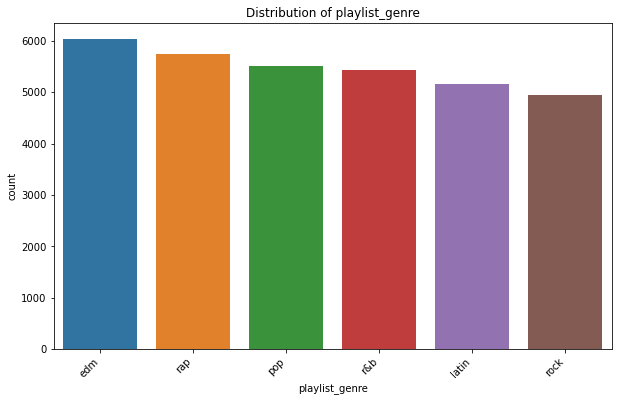

Unique values for playlist_name:
Indie Poptimism                                              308
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥               247
Permanent Wave                                               244
Hard Rock Workout                                            219
Ultimate Indie Presents... Best Indie Tracks of the 2010s    198
                                                            ... 
CSR 103:9 (GTA: SA)                                            7
Big White Room-Jessie-J                                        7
TOP 50 GLOBAL 2020 UPDATED WEEKLY 🌍🎶 WORLDWIDE                 6
ALPAS Music Festival                                           3
Post-Teen Pop                                                  1
Name: playlist_name, Length: 449, dtype: int64



C:\Users\emikl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\emikl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\emikl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\emikl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\emikl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\emikl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12540 missing from

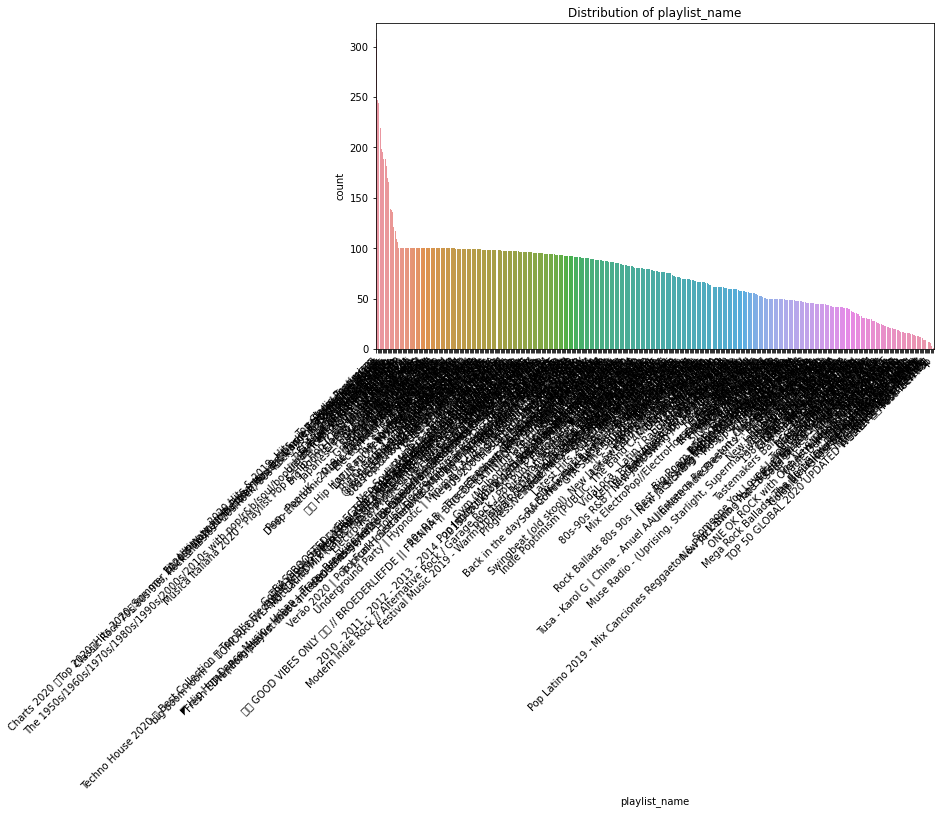

Unique values for track_artist:
Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
                   ... 
Underworld            1
The Witches           1
Tess Parks            1
Mick Harvey           1
Mat Zo                1
Name: track_artist, Length: 10692, dtype: int64



C:\Users\emikl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\emikl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\emikl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\emikl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\emikl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\emikl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12452 missing from c

ValueError: 
Joey Bada$$
         ^
Expected end of text, found '$'  (at char 9), (line:1, col:10)

<Figure size 720x432 with 1 Axes>

In [45]:
categorical_features = ['playlist_genre', 'playlist_name', 'track_artist']
for feature in categorical_features:
    print(f"Unique values for {feature}:\n{data[feature].value_counts()}\n")
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data, order=data[feature].value_counts().index)
    plt.xticks(rotation=45, ha="right")
    plt.title(f'Distribution of {feature}')
    plt.show()

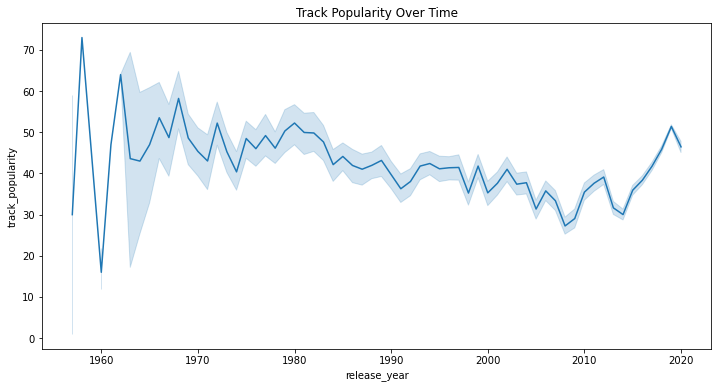

In [46]:
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'])
data['release_year'] = data['track_album_release_date'].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='track_popularity', data=data)
plt.title('Track Popularity Over Time')
plt.show()

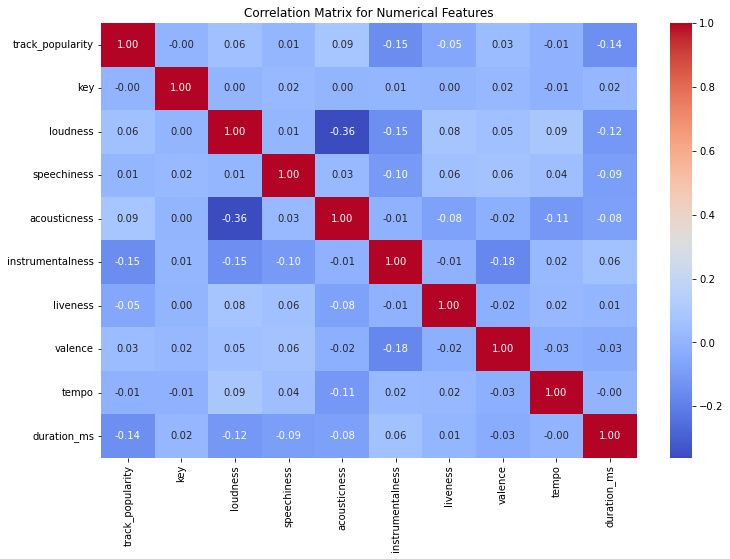

In [47]:
numerical_features = ['track_popularity', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
plt.figure(figsize=(12, 8))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

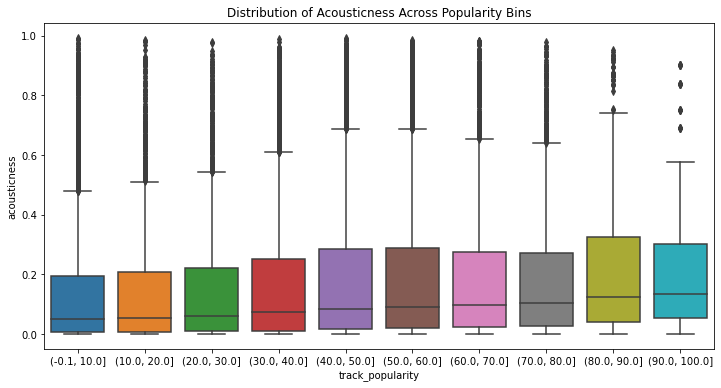

In [48]:
popularity_bins = pd.cut(data['track_popularity'], bins=10)
plt.figure(figsize=(12, 6))
sns.boxplot(x=popularity_bins, y='acousticness', data=data)
plt.title('Distribution of Acousticness Across Popularity Bins')
plt.show()

Mean Squared Error: 592.1486221531362


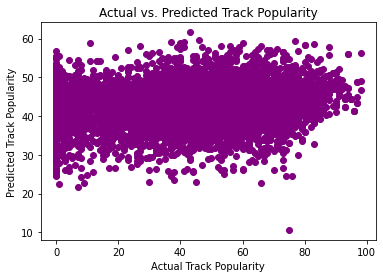

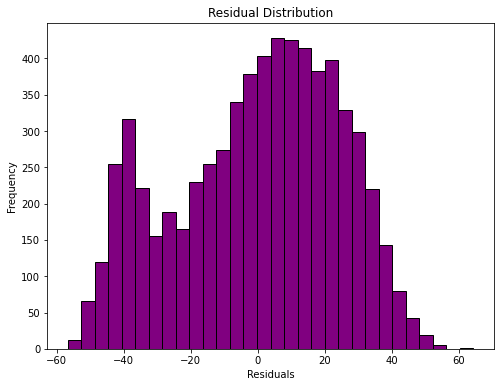

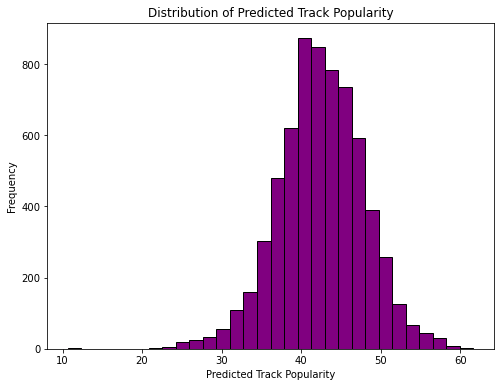

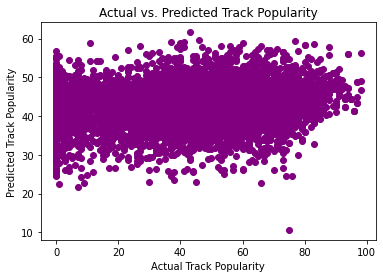

Coefficients:
[-7.0140723   6.14296093]
Intercept: 42.54283755997258
R-squared: 0.03542139079001638
Feature Importance:
    Feature  Coefficient
1  loudness     6.142961
0    energy    -7.014072


In [50]:
features = data[['energy', 'loudness']]
target = data['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

plt.scatter(y_test, predictions, color='purple')
plt.xlabel("Actual Track Popularity")
plt.ylabel("Predicted Track Popularity")
plt.title("Actual vs. Predicted Track Popularity")

plt.savefig("scatter_plot.png", transparent=True)
plt.show()

residuals = y_test - predictions
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.savefig("residual_histogram.png", transparent=True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(predictions, bins=30, edgecolor='black', color='purple')
plt.title("Distribution of Predicted Track Popularity")
plt.xlabel("Predicted Track Popularity")
plt.ylabel("Frequency")

plt.savefig("predicted_popularity_histogram.png", transparent=True)
plt.show()

plt.figure(facecolor='none') 
plt.scatter(y_test, predictions, color='purple')
plt.xlabel("Actual Track Popularity")
plt.ylabel("Predicted Track Popularity")
plt.title("Actual vs. Predicted Track Popularity")
plt.show()

coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:")
print(coefficients)
print("Intercept:", intercept)

r_squared = model.score(X_test_scaled, y_test)
print("R-squared:", r_squared)

feature_importance = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("Feature Importance:")
print(feature_importance)